# Problem :- Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features which contain biomedical measurements. Your model will be used to differentiate healthy people from people having disease. Target Column is 'status'. Identify the model with best params.

# Dataset link :-  https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data

In [19]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
data.shape

(195, 24)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

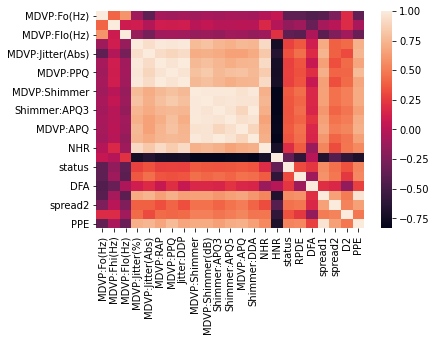

In [23]:
# Finding correlation
import matplotlib.pyplot as mp
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)
mp.show()

In [24]:
# Delete the high correlation columns.
del data["MDVP:Jitter(%)"]
del data["MDVP:Jitter(Abs)"]
del data["MDVP:APQ"]
del data["MDVP:RAP"]

In [30]:
del data["name"]

In [31]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [32]:
# X and y variable
X = data.drop("status",axis = 1) # here status column is remove.
y = data.status

In [33]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [34]:
# Split Train and Test dataset into X and y.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [35]:
# Replacing NA value with mean 
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values= np.NaN, strategy='mean')
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [36]:
# Standaraized Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
y_pred_1 = classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.98      0.91      0.94        46

    accuracy                           0.92        59
   macro avg       0.86      0.92      0.89        59
weighted avg       0.93      0.92      0.92        59



In [41]:
# Using GraidentBostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_2 = gb.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



In [ ]:
# Using Knn accuracy is 92%
# while using GradientBoostingClassifier is 97%